# Navigation - Banana Project

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import warnings
warnings.filterwarnings("ignore")

!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("The loaded brain of the current environment is:", '\033[1m' + brain_name)

The loaded brain of the current environment is: BananaBrain


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents: \033[1m', len(env_info.agents), '\033[0m')

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions: \033[1m', action_size, '\033[0m')

# examine the state space 
state = env_info.vector_observations[0]
print('States look like: \033[1m', '\n', state, '\033[0m')
state_size = len(state)
print('States have length: \033[1m', state_size, '\033[0m')

Number of agents:  1 
Number of actions:  4 
States look like:  
 [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ] 
States have length:  37 


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state

score = 0                                          # initialize the score
i = 0
while True:
    i = i + 1
    action = np.random.randint(action_size)        # select an action
   
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    
    #print('time step: ', i, 'action = ', action, ', Reward = ', reward)
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. Train the Agent with DQN

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# Import some libraries

import torch
import random
import time
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

from dqn_agent import Agent
agent = Agent(state_size=37, action_size=4, seed=10, FC1=12, FC2=6)

checkpoint_file = 'DQN_checkpoint_v3.pth'
Target_Score    = 16.0      # The objectiveof the training is to reach this average Episode Score (100 rolling)

The following is the main deep learning training function Deap Q-Network (DQN). <br/>
The used Architecture is a 4-Layer fully connected network as follows:

- `1` - The input Layer has **37** neurons (no. of States). 
- `2` - The fist hidden fully connected layer has **12** neurons.
- `3` - The second hidden fully connected layer has **6** neurons.
- `4` - The output layer has **4** neurons (no. of Actions)


In [9]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state

        score = 0
        for t in range(max_t):
            action = agent.act(state, eps).astype(int)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=Target_Score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), checkpoint_file)
            break
    return scores

Now, The above function will be called to start thr traing routine.

In [10]:
# Train the agent using DQN
# Network:   FC1 = 12  ,  FC2 = 6

start_time = time.time() # Monitor Training Time  
scores = dqn()
print("\nTotal Training time = {:.1f} min".format((time.time()-start_time)/60))

Episode 100	Average Score: 0.74
Episode 200	Average Score: 2.59
Episode 300	Average Score: 4.59
Episode 400	Average Score: 8.05
Episode 500	Average Score: 10.73
Episode 600	Average Score: 13.22
Episode 700	Average Score: 13.37
Episode 800	Average Score: 13.87
Episode 900	Average Score: 14.49
Episode 1000	Average Score: 13.81
Episode 1100	Average Score: 15.46
Episode 1200	Average Score: 15.06
Episode 1300	Average Score: 14.14
Episode 1400	Average Score: 14.61
Episode 1500	Average Score: 14.90
Episode 1600	Average Score: 15.33
Episode 1700	Average Score: 14.86
Episode 1800	Average Score: 15.94
Episode 1900	Average Score: 14.75
Episode 1949	Average Score: 16.01
Environment solved in 1849 episodes!	Average Score: 16.01

Total Training time = 42.2 min


### 5. Plot the Training Results

Plot the traing performance curve.

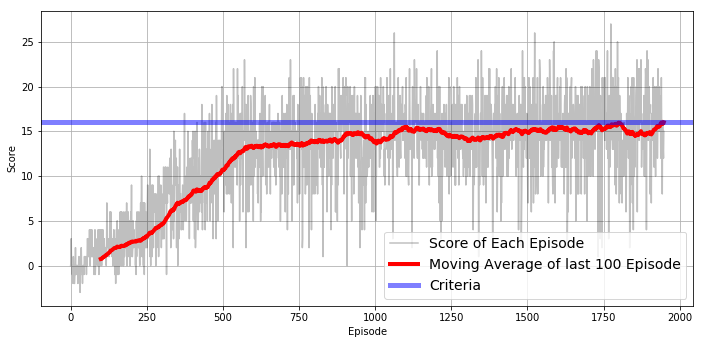

In [11]:
fig, ax = plt.subplots(1, 1, figsize=[10, 5])
plt.rcParams.update({'font.size': 14})

scores_rolling = pd.Series(scores).rolling(100).mean()
ax.plot(scores, "-", c="black", alpha=0.25)
ax.plot(scores_rolling, "-", c="red", linewidth=4)
ax.set_xlabel("Episode")
ax.set_ylabel("Score")
ax.grid(which="major")
ax.axhline(Target_Score, c="blue", linewidth=5, alpha=0.5)
ax.legend(["Score of Each Episode", "Moving Average of last 100 Episode", "Criteria"])

fig.tight_layout()
fig.savefig("result_score.jpg")

### 6. Test the Trained Agent

Below will randomly select 10 Episodes to test the trained DQN Agent.

In [13]:
## Test the saved agent

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=30, FC1=12, FC2=6)

# load the weights from file
checkpoint = checkpoint_file
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

Episode 1	Average Score: 11.00
Episode 2	Average Score: 15.50
Episode 3	Average Score: 16.33
Episode 4	Average Score: 17.00
Episode 5	Average Score: 17.60
Episode 6	Average Score: 17.17
Episode 7	Average Score: 17.43
Episode 8	Average Score: 17.38
Episode 9	Average Score: 16.67
Episode 10	Average Score: 17.00


Plot the Individual Episodes Scores From Testing.

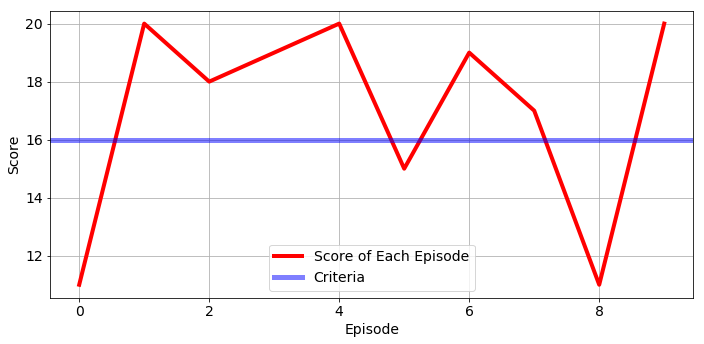

In [14]:
fig, ax = plt.subplots(1, 1, figsize=[10, 5])
plt.rcParams.update({'font.size': 14})

#scores_rolling = pd.Series(scores).rolling(5).mean()
#ax.plot(scores, "-", c="black", alpha=0.25)
ax.plot(scores, "-", c="red", linewidth=4)
ax.set_xlabel("Episode")
ax.set_ylabel("Score")
ax.grid(which="major")
ax.axhline(Target_Score, c="blue", linewidth=5, alpha=0.5)
ax.legend(["Score of Each Episode", "Criteria"])

fig.tight_layout()
fig.savefig("result_score.jpg")

When finished, you can close the environment.

In [15]:
env.close()